## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [9]:
import importlib
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roadlanes import draw_lane
import roadlanes
import adv_lane_lines
import searchlines
import perspectivetransform
import correctcamera
from glob import glob

In [10]:
importlib.reload(adv_lane_lines)
importlib.reload(roadlanes)
importlib.reload(searchlines)
importlib.reload(perspectivetransform)
importlib.reload(correctcamera)

<module 'correctcamera' from 'C:\\Users\\rafal\\Documents\\GitHub\\Udacity-CarND\\CarND-Advanced-Lane-Lines-master\\correctcamera.py'>

In [11]:
calibration = correctcamera.camera_calibration("camera_cal")
files_to_correct = glob("camera_cal/*.jpg")
correctcamera.distortion_correction(calibration, files_to_correct, "output_images")

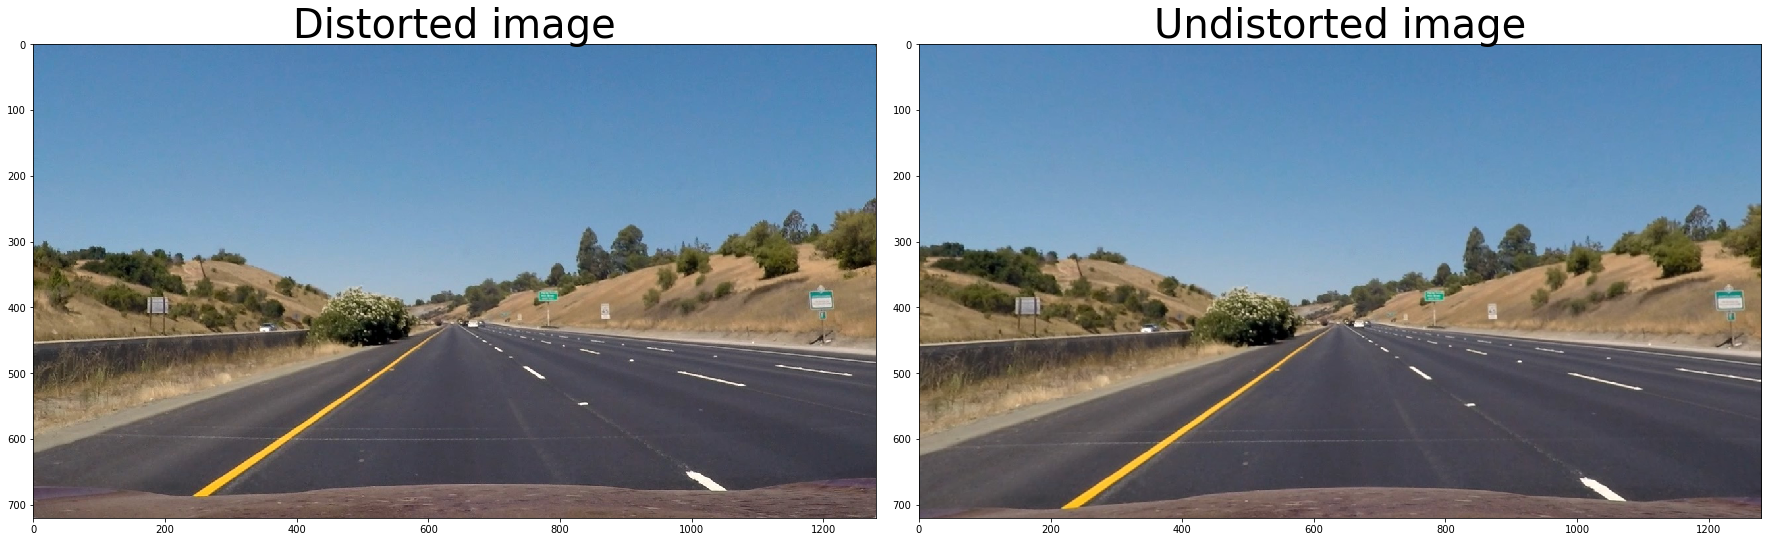

In [12]:
# undistor camera images, store artifacts
correctcamera.main()

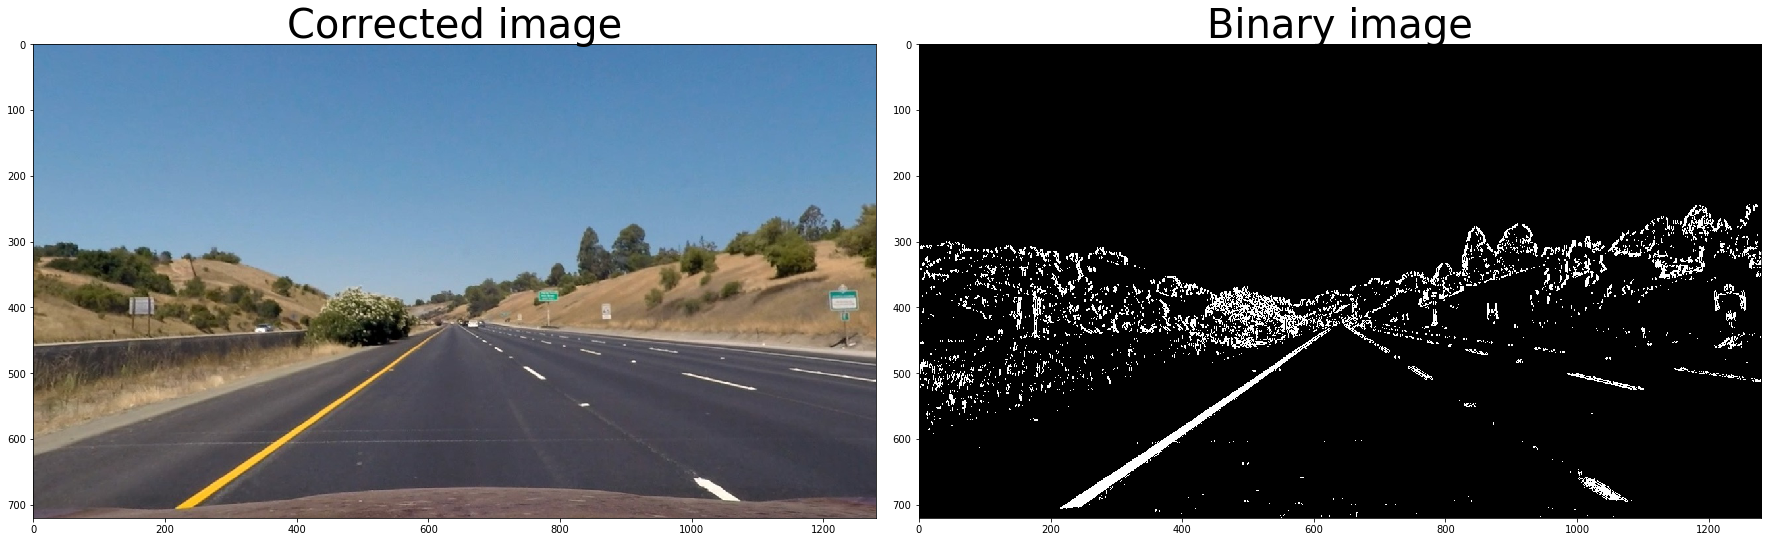

In [13]:
# discovering lines
# applying Sobel gradient and using HLS color transformation
# stacking two methods over each other
importlib.reload(searchlines)
searchlines.main()

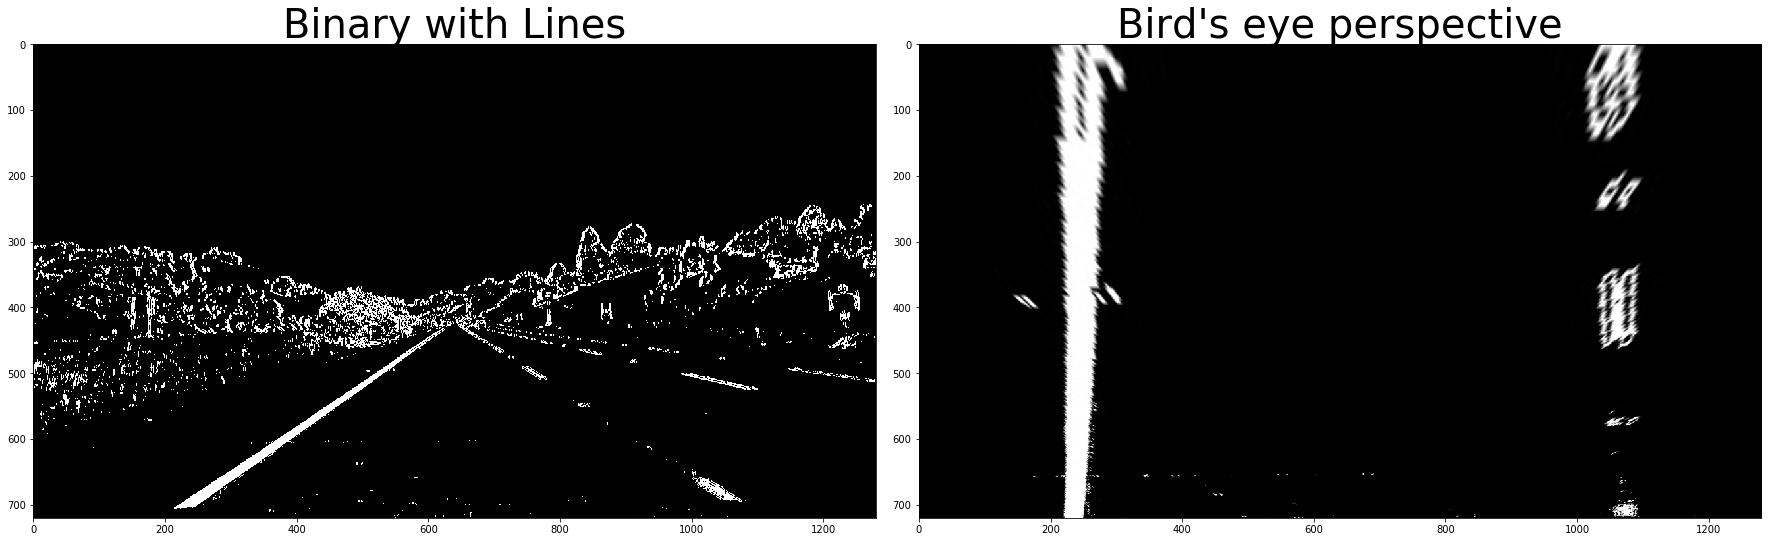

In [14]:
importlib.reload(perspectivetransform)
perspectivetransform.main()

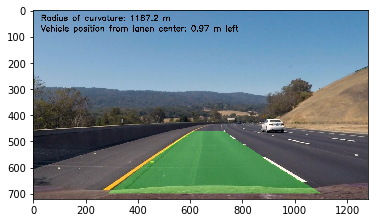

In [15]:
importlib.reload(roadlanes)
roadlanes.main_image()

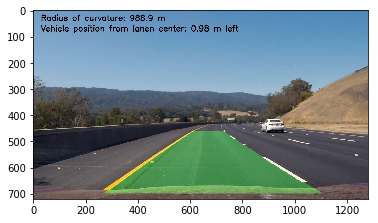

In [16]:
importlib.reload(roadlanes)
roadlanes.annotate_movie()

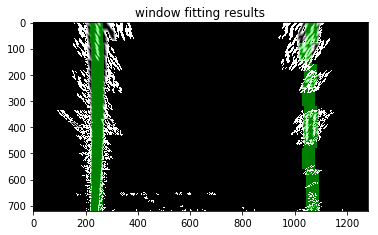

In [17]:
importlib.reload(roadlanes)
roadlanes.convolutions()